# U.S. Traffic Accidents Analytics

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Relevancy of the Data**

The U.S. Traffic Accidents dataset is highly relevant to the Department of Transportation's mission to improve public safety and reduce traffic incidents nationwide. It contains detailed information on over two million accidents, including location, time, environmental conditions, and road features. This rich dataset enables a multidimensional analysis of where, when, and why accidents occur, providing a valuable evidence base for identifying risk factors and intervention opportunities. By leveraging real-world incident data, we can build a foundation for data-driven policymaking.
<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Project Motivation and Goals**

The primary motivation behind this project is to deliver three actionable, stakeholder-informed insights based on exploratory data analysis (EDA), rather than predictive modeling. These insights will address key business questions posed by the Department of Transportation (DOT), with the aim of supporting evidence-based decision-making. Rather than optimizing for forecasting accuracy, the focus is on understanding patterns in traffic accidents that matter most to operational, policy, and planning stakeholders.

Traffic accidents are a major public safety issue, costing billions annually in damages, injuries, and lost productivity. By exploring temporal-spatial patterns, environmental risk factors, and urban–rural disparities in accident data, this project seeks to identify high-impact areas where interventions can be most effective. These findings will inform DOT decisions on infrastructure investment, emergency resource allocation, and safety policy design—ultimately contributing to reduced accident frequency, improved public safety, and more strategic transportation planning.

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Business Questions**

These questions will help us isolate contributing factors to accidents and shape actionable recommendations for prevention.

- What temporal and spatial patterns emerge in traffic accidents across the U.S.? (BQ1)
- How do environmental conditions such as visibility, precipitation, and temperature impact accident frequency or severity? (BQ2)
- Are there notable differences in accident characteristics between urban and rural areas that suggest the need for tailored safety measures? (BQ3)
  
<div style="background-color:#fff5e6; padding:15px; border-radius:8px">

**Stakeholders**

The primary stakeholders for this analysis are decision-makers within the Department of Transportation, including urban planners, public safety officials, and policy advisors. Secondary stakeholders include local governments, law enforcement agencies, and emergency response coordinators who rely on accurate accident intelligence to improve on-the-ground operations. The broader public also benefits indirectly through improved road safety and reduced accident-related costs. This project is designed to support both technical and non-technical audiences, ensuring that findings are accessible and actionable at all levels. Following some spscific key stakeholers and their link to the business questions (BQ1, BQ2 and BQ3)

**1. State and Local Transportation Departments**
Responsible for infrastructure planning and traffic regulation. They rely on temporal and spatial trends (BQ1) and urban–rural accident differences (BQ3) to improve road design, signage, and traffic control strategies.

**2. Emergency Response Services (EMS, Fire, Police)**
Need to anticipate where and when accidents occur and how weather affects severity. Relevant to temporal patterns (BQ1) and environmental conditions (BQ2) for efficient resource deployment and response time reduction.

**3. National Highway Traffic Safety Administration (NHTSA)**
Federal agency tasked with road safety policy. Interested in all three questions—trends (BQ1), environmental risks (BQ2), and urban–rural disparities (BQ3)—to shape national safety programs and funding.

**4. Insurance Companies**
Use severity patterns and environmental triggers to assess risk. Stakeholders in BQ2 (environmental impact) and BQ3 (urban–rural differentiation) to refine pricing models and fraud detection.

**5. City and Urban Planners**
Focus on accident frequency and location. Relevant to BQ1 (temporal-spatial) and BQ3 (urban vs. rural) when designing new developments or improving existing infrastructure.

**6. Weather and Environmental Agencies**
Interested in how weather variables like precipitation or fog correlate with accident risk. Support analysis of BQ2 (environmental conditions) for public safety alerts and climate-resilient infrastructure design.

**7. Public Health Officials**
Concerned with accident severity and injury outcomes across regions. Relevant to BQ2 and BQ3, especially when targeting rural communities or high-risk zones for prevention campaigns.

**Target Variables**

The first analytical question explores temporal and spatial patterns in U.S. traffic accidents, aiming to uncover when and where accidents most frequently occur. The primary target variable for this question is the count of accidents, derived from the unique ID field, though Severity may also be included to assess intensity patterns. Key features driving this analysis include temporal data such as hour, weekday, month, and season extracted from Start_Time, along with spatial indicators like City, State, Start_Lat, and Start_Lng. These insights can be effectively visualized through mapping libraries (e.g., folium, geopandas) to detect hotspots and regional differences in accident trends.

The second question investigates how environmental conditions impact accident severity, with Severity serving as the clear target variable. Environmental drivers include Temperature(F), Humidity(%), Visibility(mi), Precipitation(in), Wind_Speed(mph), and Weather_Condition. Twilight and daylight indicators such as Sunrise_Sunset, Civil_Twilight, and Nautical_Twilight also provide valuable contextual cues. This analysis aims to determine whether adverse weather conditions are associated with more serious accidents, providing insight into potential safety risks and the need for weather-adaptive traffic management policies.

The third question focuses on comparing urban versus rural accident characteristics, again using Severity as the target. Here, the challenge lies in distinguishing between urban and rural areas — a task that can be approached using city population size, clustering of GPS coordinates, or infrastructure density indicators. Relevant variables include City, Start_Lat, Start_Lng, and road feature flags such as Junction, Traffic_Signal, Crossing, and Station. The goal is to reveal whether accident types, severity, or contributing factors differ significantly by location type, which can inform the development of targeted and context-sensitive safety interventions.

# Import Libraries and Upload Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px

In [ ]:
from scipy.stats import f_oneway, randint, chi2_contingency

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [ ]:
# Random Seed
np.random.seed(42)
random.seed(42)

# Upload the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to your zip file in Colab Notebooks
zip_path = "/content/drive/MyDrive/Colab Notebooks/us_traffic_archive.zip"

In [ ]:
import zipfile

# Check what's inside the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("ZIP contents:")
    zip_ref.printdir()

📦 ZIP contents:
File Name                                             Modified             Size
US_Accidents_March23.csv                       2023-05-28 01:01:02   3058183727


In [ ]:
extract_path = "/content/us_traffic_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete.")

✅ Extraction complete.


In [ ]:
# Confirm
import os
os.listdir(extract_path)

['US_Accidents_March23.csv']

In [ ]:
# Path to the CSV inside the extracted folder
csv_path = "/content/us_traffic_data/US_Accidents_March23.csv"
df = pd.read_csv(csv_path)

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


# EDA

In [ ]:
df.columns.tolist()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [ ]:
df.shape

(7728394, 46)

In [ ]:
df.dtypes

,0
ID,object
Source,object
Severity,int64
Start_Time,object
End_Time,object
Start_Lat,float64
Start_Lng,float64
End_Lat,float64
End_Lng,float64
Distance(mi),float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

### Early Observations from Initial Data Exploration

Even at this early stage, several useful patterns emerge:

- **[BQ1 – Temporal & Spatial Patterns]**: Timestamps (`Start_Time`, `End_Time`) and location data (`Start_Lat`, `Start_Lng`) are available, enabling exploration of accident frequency by hour, day, and location.

- **[BQ2 – Environmental Conditions & Severity]**:  Weather-related fields such as `Temperature(F)`, `Humidity(%)`, `Visibility(mi)`, and `Precipitation(in)` are present, offering a strong basis for assessing how environmental conditions influence severity.

- **[BQ3 – Urban vs. Rural Differences]**:  While there's no explicit urban/rural label, road feature flags (`Junction`, `Traffic_Signal`, `Crossing`, etc.) can act as **indirect indicators** of infrastructure density.

These initial signs confirm that the dataset supports meaningful analysis for all three business questions.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


### Early Observations from Numerical Summary

Based on initial descriptive statistics:

- **[BQ1 – Spatial Patterns]**:  
  The `Start_Lat` and `Start_Lng` values span the full U.S. mainland, confirming national coverage. `Distance(mi)` shows a median accident length of only **0.03 miles**, suggesting most are **localized incidents**, potentially useful for hotspot detection.

- **[BQ2 – Environmental Conditions]**:  
  - **Temperature** averages ~62°F but has outliers below **-89°F** and above **200°F**, suggesting data cleaning is needed.  
  - **Visibility** is often **high (median = 10 mi)**, but goes down to **0**, indicating some severe weather conditions.  
  - **Wind Speed** and **Precipitation** also show extreme max values (e.g., **wind > 1000 mph**, **precip > 36 in**), again signaling outliers or faulty records.

Severity is heavily skewed toward level 2 (median = 2, 75th percentile = 2), confirming imbalance in accident seriousness — an important factor for model interpretation and stakeholder communication.

These early patterns reinforce the dataset’s suitability for analyzing traffic incidents across space, time, and weather conditions, while also highlighting the need for basic cleaning.


In [ ]:
df.nunique()

,0
ID,7728394
Source,3
Severity,4
Start_Time,6131796
End_Time,6705355
Start_Lat,2428358
Start_Lng,2482533
End_Lat,1568172
End_Lng,1605789
Distance(mi),22382


In [ ]:
# Nulls per column
df.isnull().sum().sort_values(ascending=False)

,0
End_Lng,3402762
End_Lat,3402762
Precipitation(in),2203586
Wind_Chill(F),1999019
Wind_Speed(mph),571233
Visibility(mi),177098
Wind_Direction,175206
Humidity(%),174144
Weather_Condition,173459
Temperature(F),163853


In [ ]:
# % of Missing values
(df.isnull().mean() * 100)

,0
ID,0.000000
Source,0.000000
Severity,0.000000
Start_Time,0.000000
End_Time,0.000000
Start_Lat,0.000000
Start_Lng,0.000000
End_Lat,44.029355
End_Lng,44.029355
Distance(mi),0.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

### Early Observations: Uniqueness and Missingness

Based on the uniqueness and null value distributions:

- **BQ1 - Temporal and Spatial Trends**  
  - The dataset includes **nationwide coverage**: 49 states, 13.6K cities, and over 2.4 million unique latitude values. This supports a **high-resolution spatial analysis** for trend detection and hotspot mapping.  
  - `Start_Time` and `End_Time` have millions of unique entries, enabling precise **temporal pattern analysis** by hour, day, or season.
  - `End_Lat`/`End_Lng` are missing in **~44%**, I will ignore this info and use `Start_Lat`/`Start_Lng` which are complete.

- **BQ2 - Environmental Conditions**  
  - Several environmental variables (e.g., `Temperature(F)`, `Precipitation(in)`, `Humidity(%)`) have **hundreds of unique values**, suggesting enough granularity for robust correlation with severity.  
  - However, some variables have significant missing values like Wind_Chill(F) is missing in ~26% of records and Precipitation(in) is missing in ~29%. I will assume those values ceros (No rain, no wind)

- **BQ3 - Urban vs. Rural Differences**  
  - Boolean infrastructure flags (`Junction`, `Traffic_Signal`, etc.) are fully populated and can assist in distinguishing rural vs. urban patterns.  
  - `City`, `Zipcode`, and `Street` have high cardinality but minimal missing data, supporting regional segmentation. State is complete.

There is not duplicate entries and some extreme cardinality (e.g., 7.7M unique `ID`s, 3.7M `Descriptions`) suggests those fields are not suitable for modeling, but may be useful for record tracking or grouping.

These findings confirm the dataset’s analytical richness while highlighting areas where imputation or cautious variable selection will be necessary.

In [ ]:
df.corr(numeric_only=True)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.069060,0.052862,0.083724,0.093190,0.034787,-0.020327,-0.070039,0.022293,0.042347,...,-0.004785,0.049890,-0.010352,-0.010303,-0.001678,-0.046032,-0.047106,-0.005502,-0.104901,NaN
Start_Lat,0.069060,1.000000,-0.067720,0.999993,-0.121743,0.064064,-0.443781,-0.480296,0.022364,-0.194094,...,0.002809,0.046600,-0.005312,0.002275,-0.001319,-0.050590,-0.003715,-0.004552,-0.064792,NaN
Start_Lng,0.052862,-0.067720,1.000000,-0.121735,0.999999,0.007851,-0.010652,-0.031810,0.179500,0.193185,...,0.025186,-0.034262,0.007632,-0.016957,0.000037,0.006239,-0.031081,-0.002103,0.070862,NaN
End_Lat,0.083724,0.999993,-0.121735,1.000000,-0.121732,0.067932,-0.468692,-0.489578,0.027849,-0.242143,...,0.012879,0.041223,-0.013982,0.002649,-0.002691,-0.110062,-0.013911,-0.010930,-0.047481,NaN
End_Lng,0.093190,-0.121743,0.999999,-0.121732,1.000000,0.005876,0.024084,0.006733,0.167428,0.216028,...,0.026358,-0.009776,0.012800,-0.012571,-0.000036,0.026145,-0.028812,-0.002327,0.052820,NaN
Distance(mi),0.034787,0.064064,0.007851,0.067932,0.005876,1.000000,-0.054082,-0.044309,0.008780,-0.093121,...,-0.009644,0.030164,-0.009509,-0.017251,-0.001439,-0.039792,-0.031564,-0.006047,-0.107457,NaN
Temperature(F),-0.020327,-0.443781,-0.010652,-0.468692,0.024084,-0.054082,1.000000,0.993744,-0.330939,0.109500,...,0.000694,-0.021417,0.007022,0.004571,0.000070,0.033638,0.008406,0.004947,0.047874,NaN
Wind_Chill(F),-0.070039,-0.480296,-0.031810,-0.489578,0.006733,-0.044309,0.993744,1.000000,-0.314731,0.086598,...,-0.002893,-0.030430,0.007955,0.005771,0.000255,0.039663,0.011614,0.006706,0.025507,NaN
Humidity(%),0.022293,0.022364,0.179500,0.027849,0.167428,0.008780,-0.330939,-0.314731,1.000000,0.115573,...,0.001534,0.000115,-0.008544,-0.001530,0.001115,-0.005542,-0.018117,-0.003507,-0.013867,NaN
Pressure(in),0.042347,-0.194094,0.193185,-0.242143,0.216028,-0.093121,0.109500,0.086598,0.115573,1.000000,...,0.007033,0.030465,-0.002753,0.014951,0.001279,0.036149,-0.006544,0.002045,0.039485,NaN


In [ ]:
df.skew(numeric_only=True)

,0
Severity,1.814724
Start_Lat,-0.072221
Start_Lng,-0.482920
End_Lat,-0.158217
End_Lng,-0.365492
Distance(mi),20.385759
Temperature(F),-0.513733
Wind_Chill(F),-0.672786
Humidity(%),-0.394842
Pressure(in),-3.638772


# Plots

In [ ]:
# Select numeric columns (excluding boolean)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up grid dimensions
n_cols = 3
n_rows = int(len(numeric_cols) / n_cols) + 1

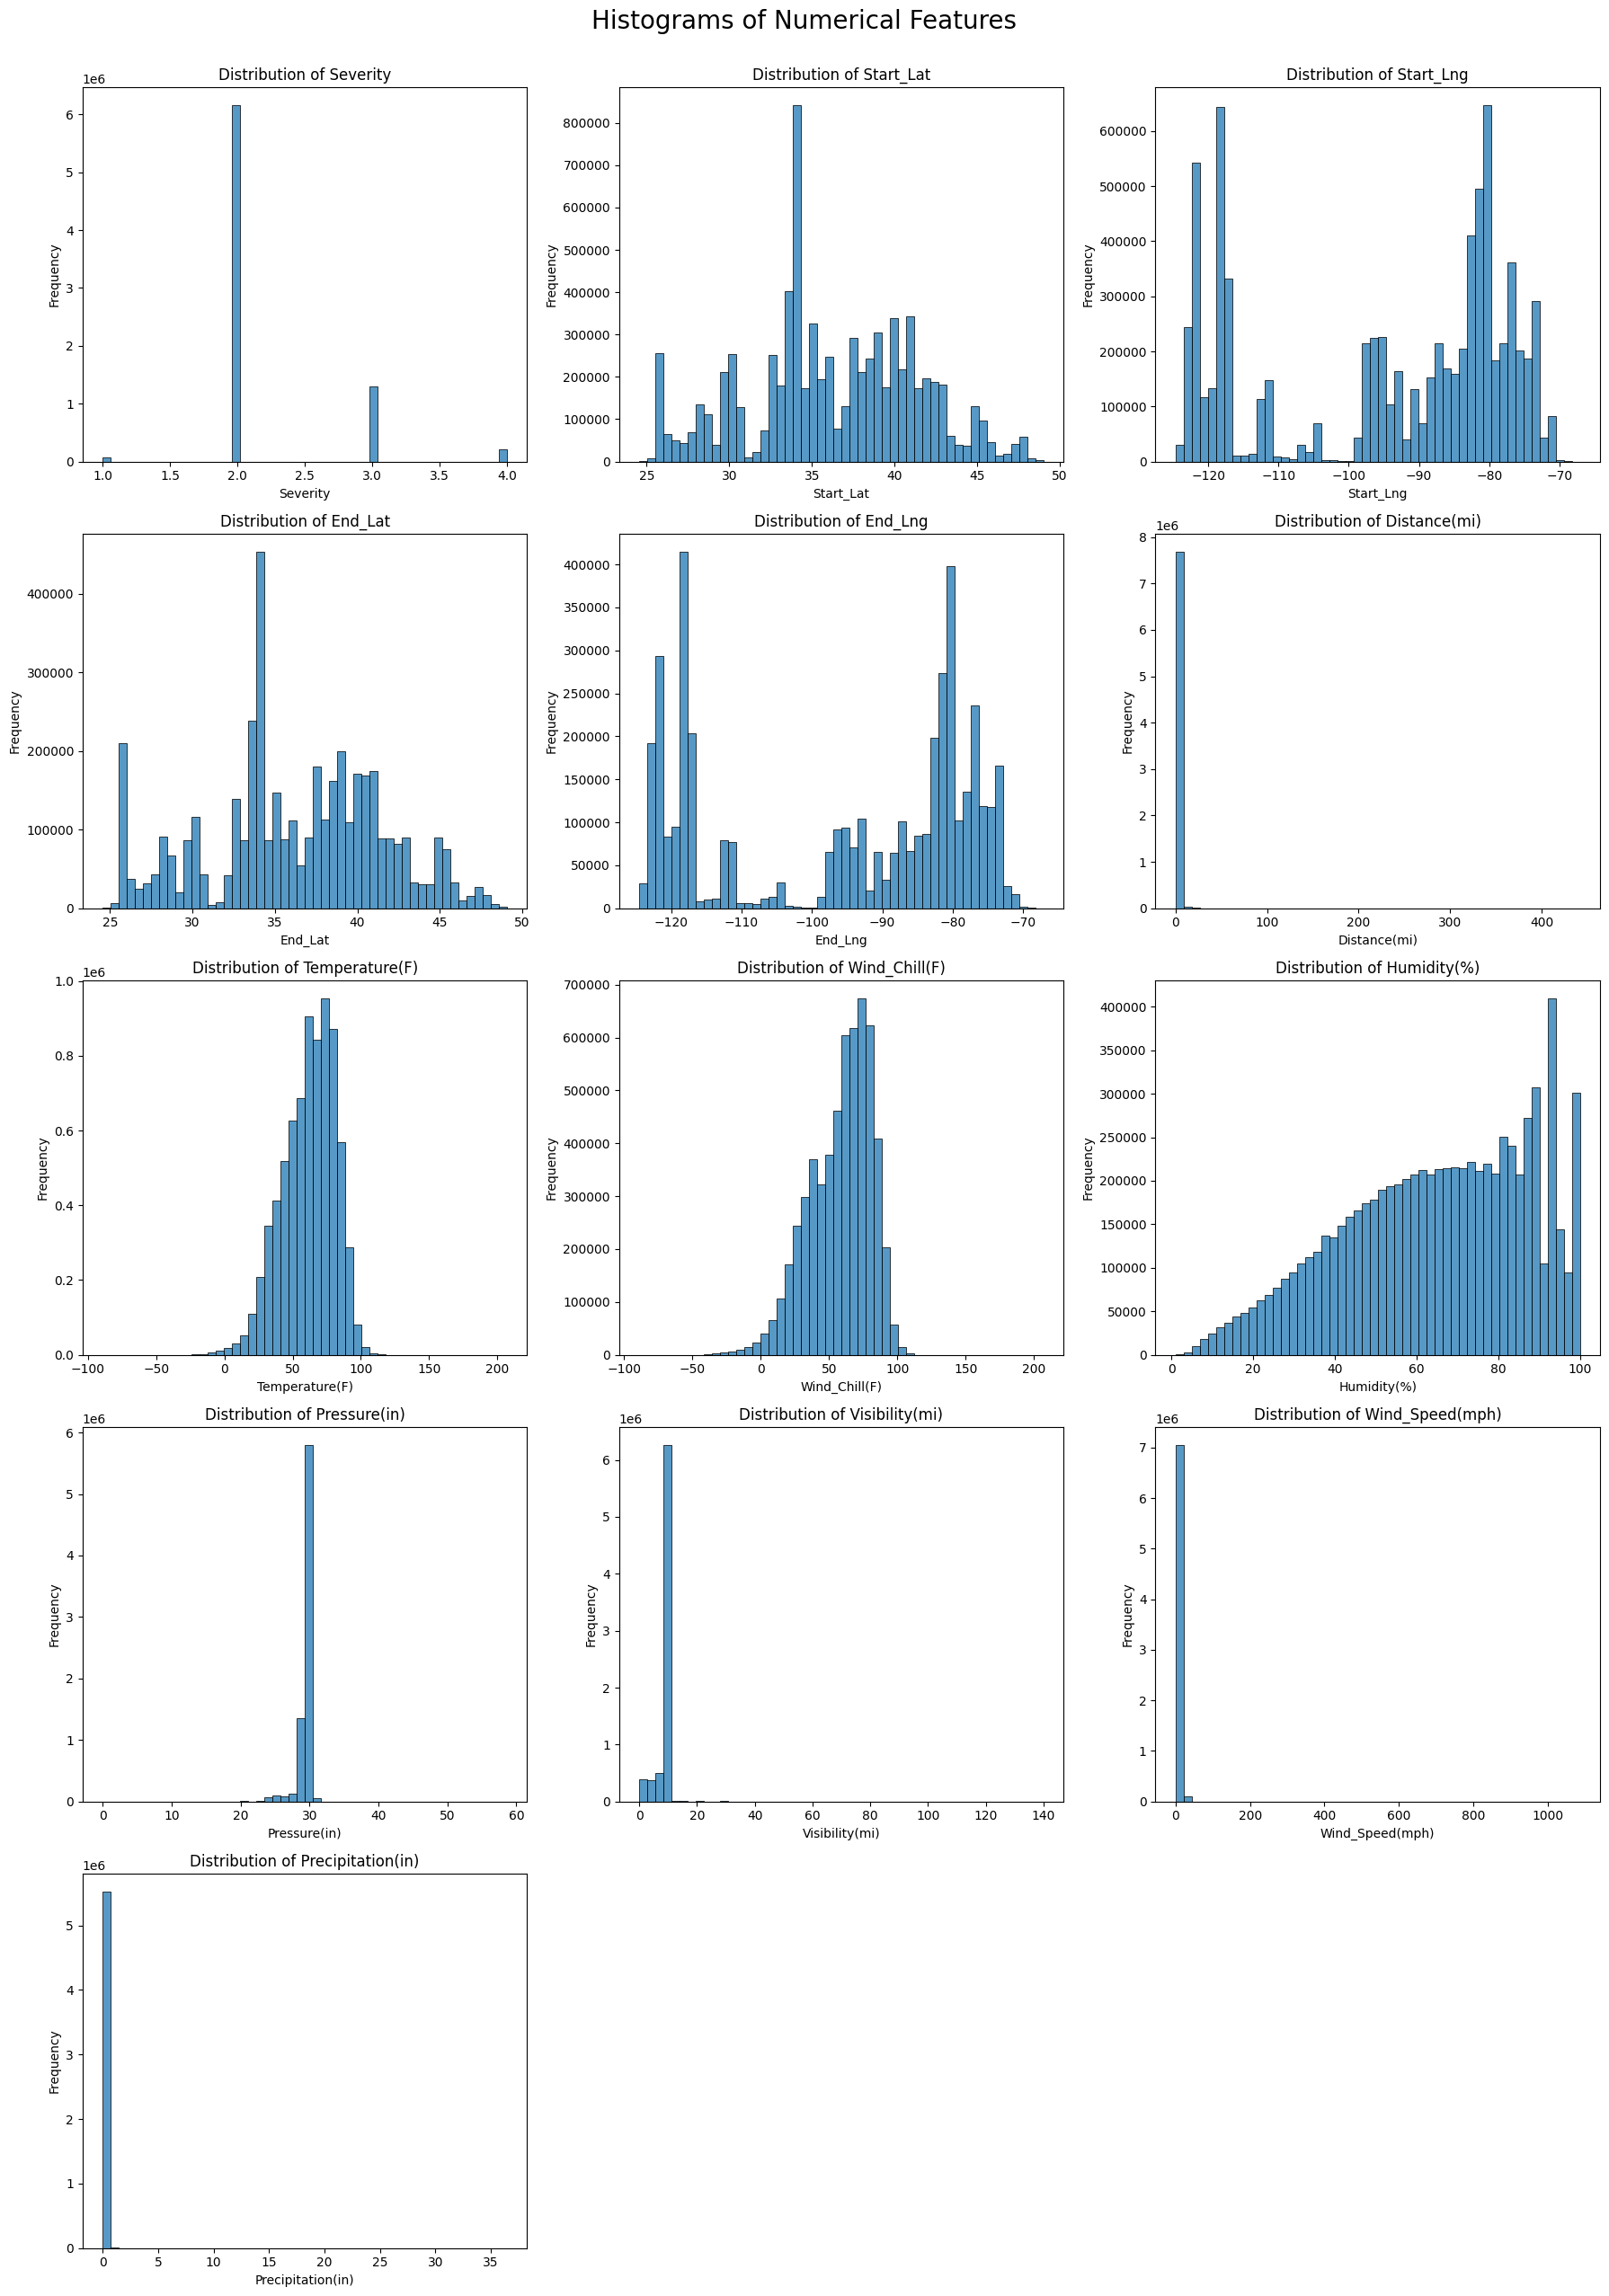

In [ ]:
# Histograms

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot each numeric feature
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), ax=axes[i], bins=50, kde=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", fontsize=20, y=1.02)
plt.show()


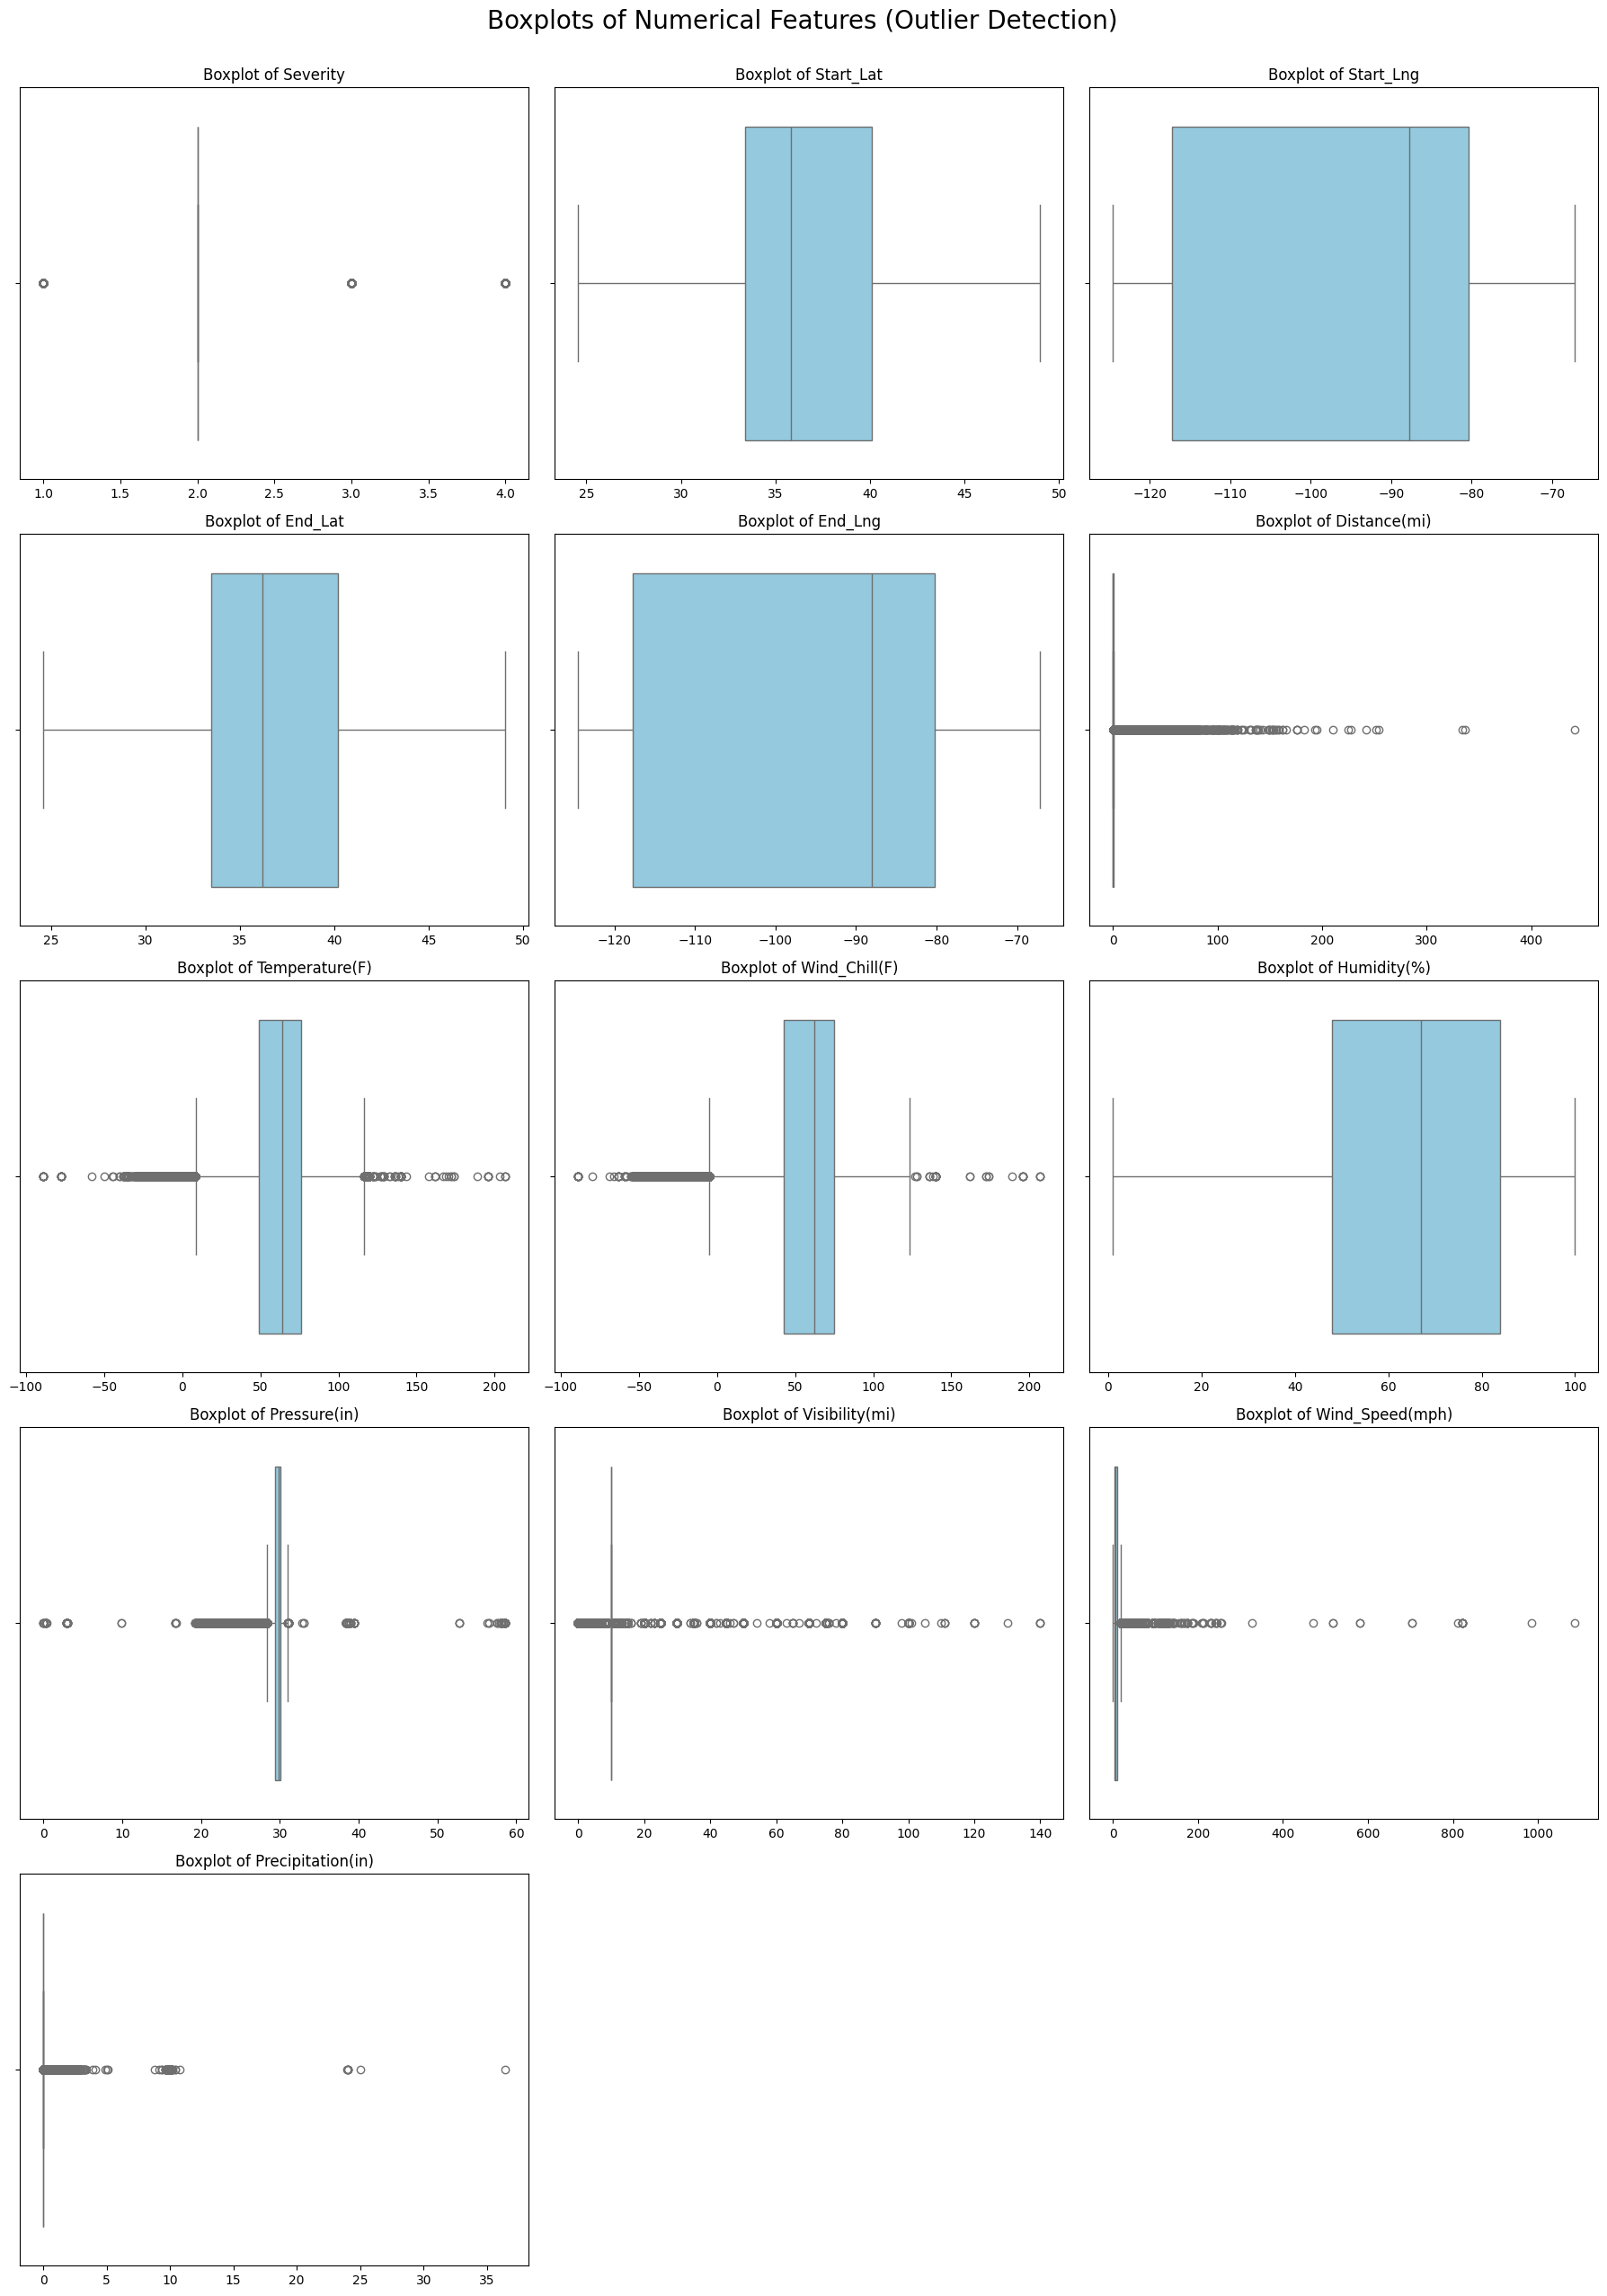

In [ ]:
# Box Plots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col].dropna(), ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features (Outlier Detection)", fontsize=20, y=1.02)
plt.show()

### Early Observations on Histograms, Boxplots and skew value

Severity is heavily skewed toward level 2, confirming earlier findings from descriptive statistics. This class imbalance should be kept in mind when modeling or drawing conclusions related to severity.

Distance(mi) is highly right-skewed (skewness ≈ 20.4), with the majority of accidents covering very short distances. A few outliers span hundreds of miles, possibly due to data entry errors or specific edge cases (e.g., highway closures). I will cap the the outliers to the 75% percentile value since +1mile of the accident is unrealistic.

Precipitation(in) shows extreme skewness (skew ≈ 86), with most values close to zero, suggesting accidents in dry conditions are far more common. A few entries with very high precipitation levels warrant further inspection (outliers or sensor misreads). A typical hourly rainfall is about 2 inches per hour. So I will cap to 5 inches considering extrely heavy storms.

Wind_Speed(mph) and Pressure(in) also show right-skewed distributions with noticeable outliers. Some wind speeds exceed 1000 mph and pressures surpass 58 inHg—these are likely invalid data points needing removal or imputation. In a storm, the wind seed reaches 70-80 mph, so the outliers are unrealistc, I will cap to 80 considering the rare case of a storm.

Visibility(mi) is mostly concentrated at 10 miles, with some extreme outliers above 100 miles. This again suggests the presence of erroneous values or special reporting scenarios. Human visibility in a clear day shouldn't be more than 20 miles and 25-75% quarter is in 10 miles. So I will cap to 20

Temperature(F) displays more symmetric distributions but still have minor outliers. Temperatures below -80°F or above 200°F are not realistic and should be cleaned. Normal Temp range: ~-50°F to 130°F (Antarctica to Death Valley). I will cap to those realistic values values.

Humidity(%) should be between 0-100% (very extreme), so no outliers, no action.

Pressure at sea level is aroung 30in and the boxplot is presenting a lot of value outside 25% - 75% quartile (29-30 in), which is sea level. I will drop this variable.

**Boolean Variables**

The dataset includes several Boolean (binary) features. Most of these variables are highly imbalanced, with values close to zero across the dataset. For example, Bump is True in fewer than 0.05% of cases, and Roundabout has similarly extreme skew (≈0.6%). These rare occurrences raise concerns about data sparsity and limited predictive power in standard models, unless targeted oversampling or rare-event modeling is applied.

From a business perspective, these Boolean features could provide important insights for BQ1 (spatial patterns) and BQ3 (urban vs. rural differences). Features like Traffic_Signal, Junction, and Crossing are much more common in urban areas and can help differentiate location types. Their distribution could be valuable for clustering locations or engineering a proxy variable for urbanicity, especially in the absence of a direct "urban/rural" label.

Overall, the Boolean variables—while sparse—are not irrelevant. With smart preprocessing and grouping, they can add contextual insight into road infrastructure and help answer which features contribute to more severe accidents, especially in different geographic contexts (BQ3). More details added in future recommendations section

In [ ]:
# Correlation Matrix
corr_matrix = df[numeric_cols].corr()
corr_matrix

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Severity,1.000000,0.069060,0.052862,0.083724,0.093190,0.034787,-0.020327,-0.070039,0.022293,0.042347,-0.003473,0.040214,0.021080
Start_Lat,0.069060,1.000000,-0.067720,0.999993,-0.121743,0.064064,-0.443781,-0.480296,0.022364,-0.194094,-0.088500,0.032908,0.000279
Start_Lng,0.052862,-0.067720,1.000000,-0.121735,0.999999,0.007851,-0.010652,-0.031810,0.179500,0.193185,-0.015322,0.077353,0.027619
End_Lat,0.083724,0.999993,-0.121735,1.000000,-0.121732,0.067932,-0.468692,-0.489578,0.027849,-0.242143,-0.116199,0.017373,-0.003639
End_Lng,0.093190,-0.121743,0.999999,-0.121732,1.000000,0.005876,0.024084,0.006733,0.167428,0.216028,0.006155,0.092303,0.025536
Distance(mi),0.034787,0.064064,0.007851,0.067932,0.005876,1.000000,-0.054082,-0.044309,0.008780,-0.093121,-0.037225,0.008989,-0.001480
Temperature(F),-0.020327,-0.443781,-0.010652,-0.468692,0.024084,-0.054082,1.000000,0.993744,-0.330939,0.109500,0.217173,0.033750,-0.004633
Wind_Chill(F),-0.070039,-0.480296,-0.031810,-0.489578,0.006733,-0.044309,0.993744,1.000000,-0.314731,0.086598,0.234022,-0.043008,-0.012143
Humidity(%),0.022293,0.022364,0.179500,0.027849,0.167428,0.008780,-0.330939,-0.314731,1.000000,0.115573,-0.384261,-0.172403,0.076936
Pressure(in),0.042347,-0.194094,0.193185,-0.242143,0.216028,-0.093121,0.109500,0.086598,0.115573,1.000000,0.038161,-0.022609,0.016511


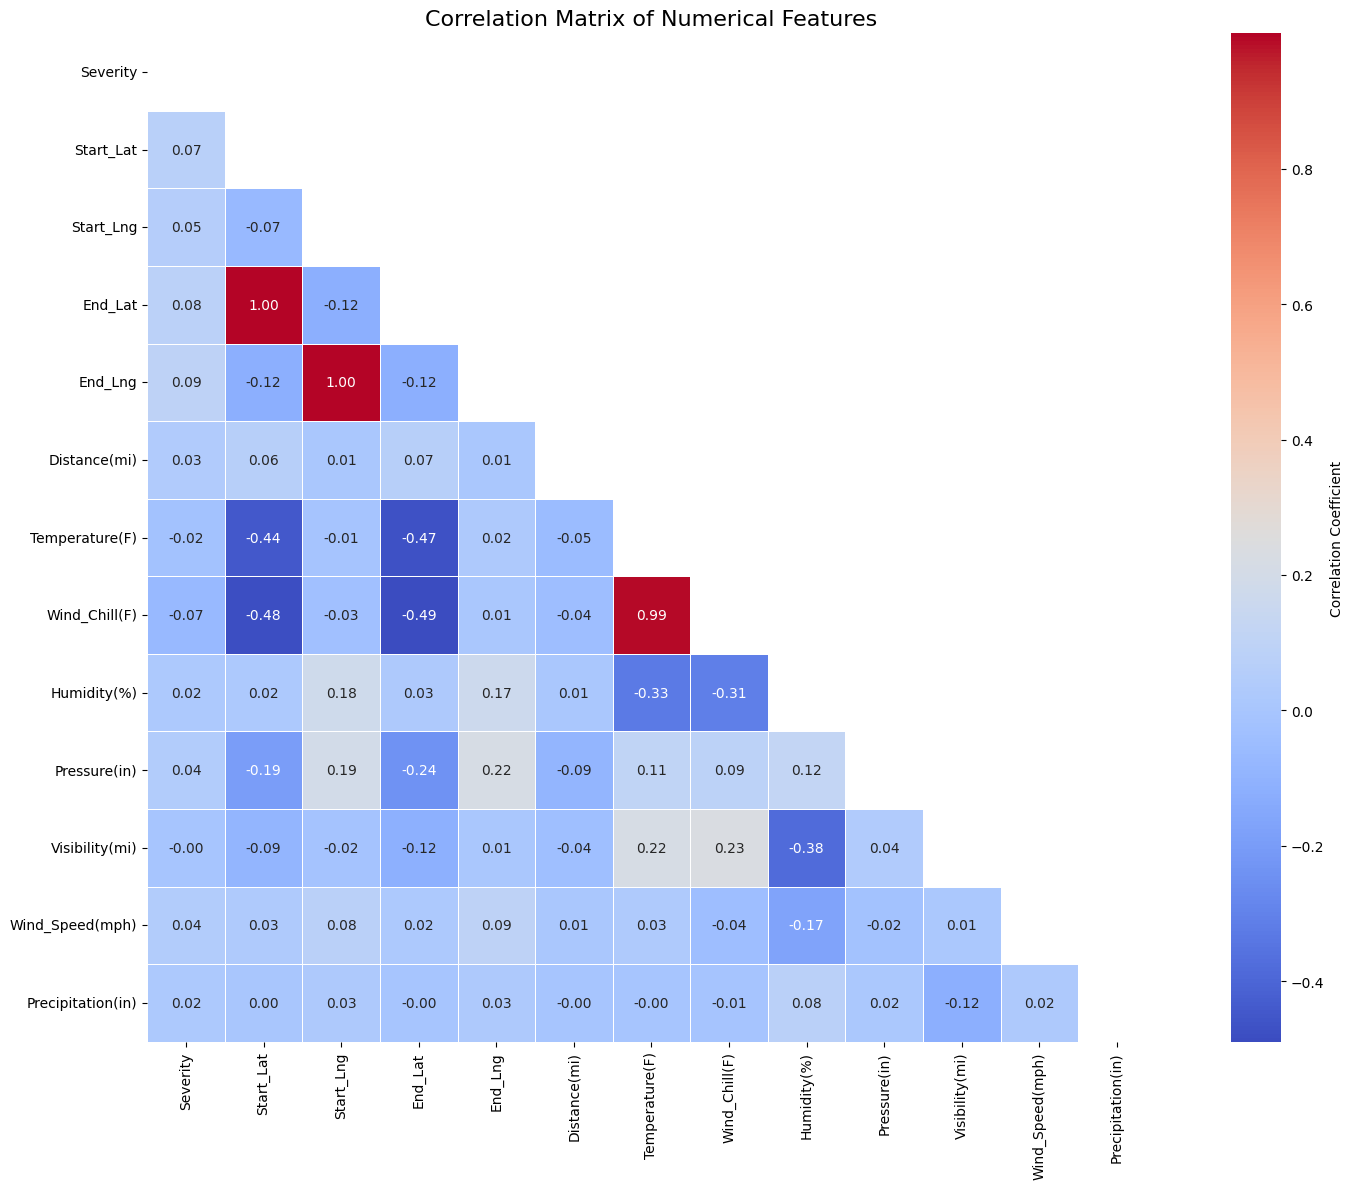

In [ ]:
# Heat Map Correlation
plt.figure(figsize=(16, 12))

# Plot heatmap
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'},
    square=True,
    mask=np.triu(corr_matrix))

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

**Observations from the Correlation Matrix**

The correlation matrix reveals that Severity has very low linear correlation with all numerical features. The strongest correlations observed are with End_Lng (ρ = 0.093), End_Lat (ρ = 0.084), and Start_Lat (ρ = 0.069). These values are too weak to suggest any direct linear relationship, indicating that accident severity is likely influenced by combinations of factors—such as poor weather in rural areas—rather than single features alone. This insight is critical for business questions related to predicting severity and identifying the most impactful risk factors.

We also observed an extremely high correlation between Temperature(F) and Wind_Chill(F) (ρ = 0.99). Since these variables are almost interchangeable, it would be wise to avoid multicollinearity by selecting one of them or engineering a composite weather feature. This simplification supports feature selection for environmental risk modeling.

An important environmental interaction was detected between Visibility(mi) and Humidity(%), with a correlation of -0.38. This negative relationship confirms that higher humidity tends to reduce visibility, a known factor in accident risk. Additionally, Humidity(%) and Temperature(F) also show a moderate negative correlation (-0.33). These findings are directly relevant to BQ1 and BQ3, suggesting that foggy or humid conditions might elevate accident risk, particularly during certain times of day or in certain regions.

A particularly strong correlation exists between Start_Lat and End_Lat, as well as Start_Lng and End_Lng, with values nearly equal to 1. This is valuable for answering where severe accidents occur (Q1) and helps in targeting resources to high-risk zones. It also supports the development of infrastructure-oriented insights (Q2), such as whether accidents happen near junctions or particular road layouts.

**Summary from EDA**

The dataset includes \~7.7 million U.S. traffic accident records with rich spatial, temporal, environmental, and road-related data. This breadth supports analysis for identifying national traffic trends and informing Department of Transportation (DOT) safety strategies.

Several columns contain **missing values**, especially `End_Lat`, `End_Lng` (\~44%), `Wind_Chill(F)` (26%), and `Precipitation(in)` (28%). These may be dropped or imputed based on their relevance. Moderate missingness (1–8%) appears in variables like `Temperature(F)`, `Humidity(%)`, `Visibility(mi)`, and `Timezone`, which can be retained with targeted cleaning. Columns like `Start_Lat`, `Start_Lng`, and `Severity` are complete and reliable.

**Data types need standardization**, especially for time-related columns (`Start_Time`, `End_Time`, `Weather_Timestamp`), which should be converted to datetime. Twilight columns can be simplified into day/night indicators. Boolean flags (e.g., `Junction`, `Traffic_Signal`) are already well-formatted and useful for road infrastructure analysis.

The **distribution analysis** shows that many numerical features are **highly skewed**, particularly `Distance(mi)`, `Precipitation(in)`, and `Wind_Speed(mph)`, suggesting a need for log transformation, binning, or clipping. The `Severity` variable is **class imbalanced**, with most records falling under class 2. This should be addressed in any modeling effort to avoid bias.

The **Boolean variables** are mostly sparse and imbalanced. Flags like `Roundabout`, `Turning_Loop`, and `Bump` are rarely True, but they may still carry contextual value, especially when grouped into broader indicators. For example, combining rare road features into a composite flag like `has_special_design` could improve utility without inflating dimensionality.

**Outlier detection via boxplots** confirms that nearly all numerical features contain extreme values beyond the IQR, especially weather-related ones. This reinforces the need for robust statistical handling and outlier treatment, particularly for variables like `Distance(mi)` and `Precipitation(in)` that can distort downstream analysis.

Finally, the **correlation matrix** shows that most features have weak linear relationships with `Severity`. The strongest observed was between `Temperature(F)` and `Wind_Chill(F)` (r = 0.99), indicating redundancy. Environmental variables are more correlated with each other than with severity, suggesting that accident severity likely arises from nonlinear or multivariate interactions, rather than from any single factor alone.

**Stakeholder Centered Conclusion from EDA Findings**

The exploratory data analysis (EDA) reveals several key patterns and challenges that directly impact stakeholders across the transportation and public safety landscape. For state and local transportation departments, the clear concentration of accidents in specific latitude-longitude zones (as shown by hotspot potential) and temporal regularities (weekday and hour) provide a strong foundation for optimizing road infrastructure, signage, and traffic control strategies (BQ1, BQ3). The skewed severity distribution, with most accidents being moderate (level 2), alongside environmental anomalies such as extreme outliers in precipitation and wind speed, are particularly relevant for emergency response services who must anticipate severe-weather-driven incidents and deploy resources accordingly (BQ1, BQ2).

For federal agencies like NHTSA, the combination of skewed numeric distributions, weak linear correlations with severity, and strong spatial patterns reinforces the need for multivariate and non-linear modeling to guide nationwide safety policy (BQ1–BQ3). The strong redundancy found between some weather variables (e.g., Temperature and Wind Chill) suggests a need for careful feature selection—crucial for insurance companies refining risk assessment models and urban–rural pricing strategies (BQ2, BQ3). Similarly, urban planners can act on geographic clustering and sparse use of infrastructure features (e.g., Traffic_Signal, Junction), which may point to gaps in traffic design, particularly in less dense areas (BQ1, BQ3).

Lastly, the highly imbalanced and sparse nature of many Boolean flags (e.g., Roundabout, No_Exit) informs weather and environmental agencies and public health officials of the rarity—but potential risk factor—of certain road features during extreme weather. These patterns support targeted safety messaging, preventive infrastructure design, and rural risk mitigation strategies (BQ2, BQ3). In summary, the EDA highlights data-driven insights and quality issues that can shape more informed decisions for each stakeholder group involved.

# Handle missing values

1.   End_Lat
2.   End_lng



In [ ]:
# Drop columns with excessive missing values
df.drop(columns=['End_Lat', 'End_Lng'], inplace=True)

We removed End_Lat and End_Lng due to over 44% missing data. Since we retain Start_Lat and Start_Lng, we can still perform accurate spatial analysis without redundancy.

We decided to keep Precipitation(in) and Wind_Chill(F), as missing values are likely to reflect the absence of rain or wind. This interpretation preserves valuable environmental information without unnecessary imputation.

This approach balances analytical value and data quality, ensuring we retain the signal in key spatial and environmental features while removing sparse or redundant columns that could otherwise degrade model performance or increase preprocessing complexity.

# Handle missing values - Temperature and Wind

We already decided that missing values is equal to no rain, no wind, so we are going to replace those values for ceros

In [ ]:
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(0.0)
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(0.0)

# Outliers

### From Early Observations on Histograms, Boxplots and skew value

Distance(mi) is highly right-skewed (skewness ≈ 20.4), with the majority of accidents covering very short distances. A few outliers span hundreds of miles, possibly due to data entry errors or specific edge cases (e.g., highway closures). I will cap the the outliers to the 75% percentile value (~0.5) since +1mile of the accident is unrealistic.

Precipitation(in) shows extreme skewness (skew ≈ 86), with most values close to zero, suggesting accidents in dry conditions are far more common. A few entries with very high precipitation levels warrant further inspection (outliers or sensor misreads). A typical hourly rainfall is about 2 inches per hour. So I will cap to 5 inches considering extrely heavy storms.

Wind_Speed(mph) and Pressure(in) also show right-skewed distributions with noticeable outliers. Some wind speeds exceed 1000 mph and pressures surpass 58 inHg—these are likely invalid data points needing removal or imputation. In a storm, the wind seed reaches 70-80 mph, so the outliers are unrealistc, I will cap to 80 considering the rare case of a storm.

Visibility(mi) is mostly concentrated at 10 miles, with some extreme outliers above 100 miles. This again suggests the presence of erroneous values or special reporting scenarios. Human visibility in a clear day shouldn't be more than 20 miles and 25-75% quarter is in 10 miles. So I will cap to 20

Temperature(F) displays more symmetric distributions but still have minor outliers. Temperatures below -80°F or above 200°F are not realistic and should be cleaned. Normal Temp range: ~-50°F to 130°F (Antarctica to Death Valley). I will cap to those realistic values values.

Humidity(%) should be between 0-100% (very extreme), so no outliers, no action.

Pressure at sea level is aroung 30in and the boxplot is presenting a lot of value outside 25% - 75% quartile (29-30 in), which is sea level. I will drop this variable.

In [ ]:
df['Distance(mi)'] = df['Distance(mi)'].clip(upper=0.5)
df['Precipitation(in)'] = df['Precipitation(in)'].clip(upper=5.0)
df['Visibility(mi)'] = df['Visibility(mi)'].clip(upper=20.0)
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].clip(upper=80.0)
df['Temperature(F)'] = df['Temperature(F)'].clip(lower=-50.0, upper=130.0)

# Date Time

In [ ]:
# Convert datetime columns
datetime_columns = ['Start_Time', 'End_Time', 'Weather_Timestamp']
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Check for inconsistent durations where End_Time is before Start_Time
(df['End_Time'] < df['Start_Time']).sum()

np.int64(0)

pd.to_datetime() safely converts each column to proper datetime format. errors='coerce' ensures that any invalid date strings are converted to NaT (missing datetime), preventing errors. These conversions are necessary for extracting features like hour, weekday, or season in later steps.

It counts how many rows have an End_Time earlier than Start_Time, which should logically never happen.

# Extract hour, month, weekday

In [ ]:
# Extract hour, weekday, and month from Start_Time
df['hour'] = df['Start_Time'].dt.hour
df['weekday'] = df['Start_Time'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['Start_Time'].dt.month

# Map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

# Address Outliers & Skew

In [ ]:
# Bin distance into categories
bins = [0, 0.5, 2, 10, np.inf]
labels = ['Very Short', 'Short', 'Medium', 'Long']
df['Distance_Bin'] = pd.cut(df['Distance(mi)'], bins=bins, labels=labels)

In [ ]:
# Apply log1p to manage zero values
df['Wind_Speed_log'] = np.log1p(df['Wind_Speed(mph)'])
df['Precipitation_log'] = np.log1p(df['Precipitation(in)'])

Distance(mi) was binned into four categories — Very Short, Short, Medium, and Long — using practical thresholds (0.5, 2, and 10 miles). This supports more interpretable insights into the extent of incidents and simplifies downstream modeling.

Wind_Speed(mph) and Precipitation(in) were both log-transformed using np.log1p() to manage extreme right-skew while preserving meaningful zero values. These transformations reduce the impact of rare weather events and improve the statistical behavior of the features.

We assume missing values in Precipitation(in) often indicate no measurable rainfall, which aligns with real-world reporting. Together, these transformations prepare the dataset for robust analysis and modeling while maintaining environmental signal integrity.

In [ ]:
# Convert twilight-related columns to categorical type
twilight_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

for col in twilight_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Show unique values for twilight-related columns
for col in twilight_cols:
    print(f"{col}: {df[col].unique()}")

Sunrise_Sunset: ['Night', 'Day', NaN]
Categories (2, object): ['Day', 'Night']
Civil_Twilight: ['Night', 'Day', NaN]
Categories (2, object): ['Day', 'Night']
Nautical_Twilight: ['Night', 'Day', NaN]
Categories (2, object): ['Day', 'Night']
Astronomical_Twilight: ['Night', 'Day', NaN]
Categories (2, object): ['Day', 'Night']


In [ ]:
# Drop the more technical twilight columns
df.drop(['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1, inplace=True)

All four twilight-related columns (Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight) were validated and converted into categorical types. Each contains two distinct categories ('Day', 'Night') plus some missing values (about 3% NaN). This ensures consistency for grouping or encoding, and prepares these features for categorical analysis or model input.

To streamline the analysis and reduce redundancy, only one twilight-related variable — **Sunrise\_Sunset** — was retained. This variable effectively captures whether the accident occurred during the **day or night**, enabling exploration of time-of-day impacts on accident **frequency and severity**. Including this feature also supports potential cross-analysis with **weather conditions**, such as reduced visibility or precipitation patterns commonly associated with nighttime driving.

# Boolean Variables Double Check

In [ ]:
# Boolean feature check
bool_cols = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop'
]

# Check if all are boolean types
df[bool_cols].dtypes

,0
Amenity,bool
Bump,bool
Crossing,bool
Give_Way,bool
Junction,bool
No_Exit,bool
Railway,bool
Roundabout,bool
Station,bool
Stop,bool


# Create interesting Derived Featues

In [ ]:
# Calculate duration in hours
df['duration_hr'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600

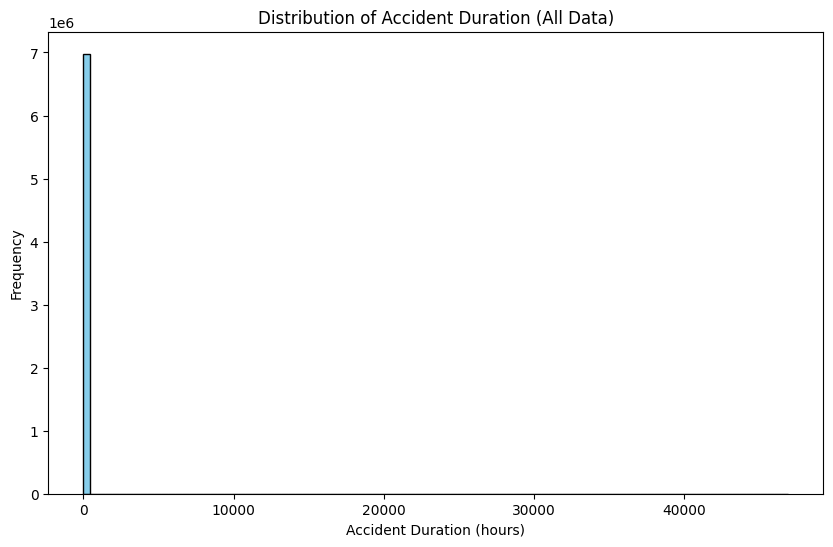

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration_hr'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Accident Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Accident Duration (All Data)')
plt.show()

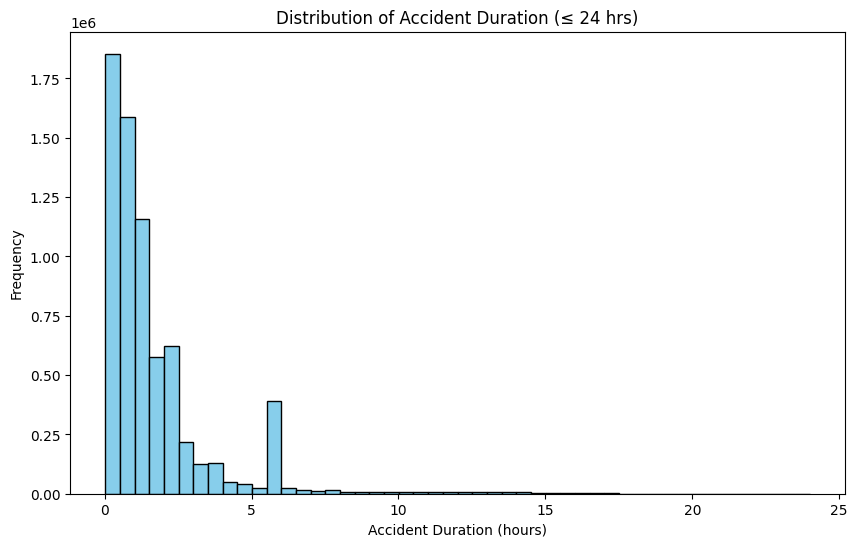

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['duration_hr'] <= 24]['duration_hr'], bins=48, color='skyblue', edgecolor='black')
plt.xlabel('Accident Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Accident Duration (≤ 24 hrs)')
plt.show()

Most accidents last under 2 hours, with a steep decline thereafter. There's a right-skewed distribution, indicating that while short incidents are most common, a few longer durations (e.g., over 6–8 hours) still occur. A small spike at 6 hours may indicate systematic reporting (e.g., default or rounded durations) — worth noting as a potential data artifact.

# Interaction Variables

Following three interaction terms that are highly relevant based on your business questions and selected features:

1. Precipitation(in) × Visibility(mi)
Heavy precipitation often leads to reduced visibility, but the effect on accidents may not be linear. This interaction helps capture compounded weather risk — for example, light rain with clear visibility may not be as dangerous as heavy rain with fog.

2. Hour of Day × Weather_Condition
The same weather condition can have different effects depending on the time of day. Fog at night or early morning may be more dangerous than fog during daylight. This interaction lets you explore how temporal and environmental conditions together influence accident severity.

3. State × Distance_Bin
Long-distance accidents may be more common or severe in rural states with highways, while short-distance incidents may dominate in urban areas. This interaction helps expose state-level infrastructure or policy differences that affect accident patterns.

In [ ]:
# Precipitation × Visibility
df['Precip_Vis_Interaction'] = df['Precipitation(in)'] * df['Visibility(mi)']

In [ ]:
# Hour of Day × Weather Condition

# Extract hour if not already done
df['hour'] = df['Start_Time'].dt.hour

# Combine as string (categorical interaction)
df['Hour_Weather_Interaction'] = df['hour'].astype(str) + '_' + df['Weather_Condition'].astype(str)

In [ ]:
# State x Distance Bin

df['State_Distance_Interaction'] = df['State'] + '_' + df['Distance_Bin'].astype(str)

We created an interaction feature State_Distance_Interaction by combining state and distance bin. This allows us to identify geographic patterns in accident severity related to trip length. For example, long-distance accidents may be more common in highway-dense rural states, while short-distance ones cluster in urban centers. This categorical feature is also well suited for Tableau dashboard filtering and group comparisons.

/tmp/ipython-input-2271276230.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='Severity',


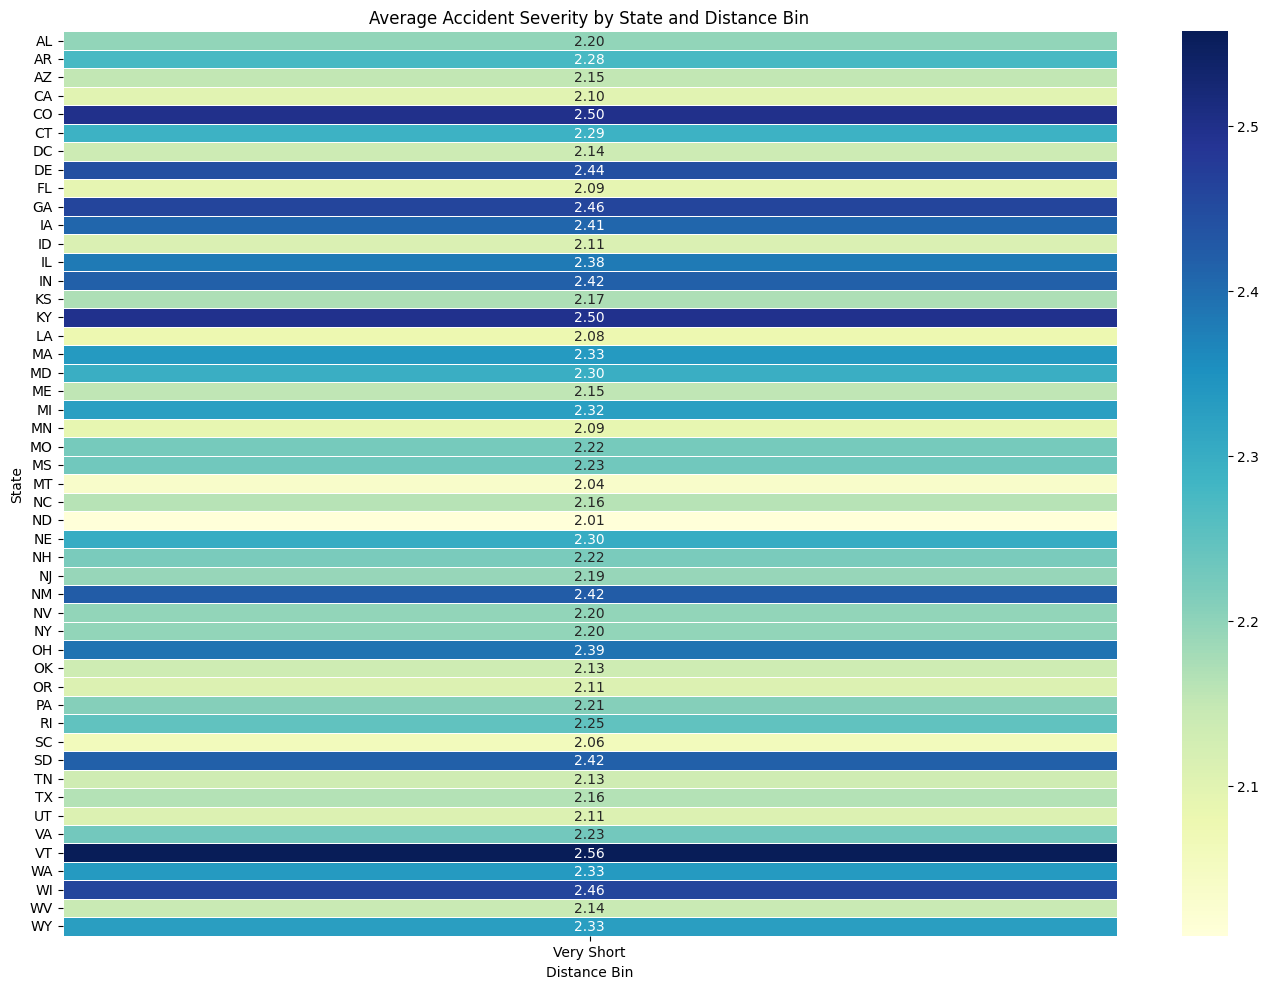

In [ ]:
# Visualize the average severity of traffic accidents across states and distance bins.

# Pivot table of average severity
pivot_table = df.pivot_table(values='Severity',
                             index='State',
                             columns='Distance_Bin',
                             aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Average Accident Severity by State and Distance Bin")
plt.xlabel("Distance Bin")
plt.ylabel("State")
plt.tight_layout()
plt.show()

To analyze how accident severity varies by geography and trip length, we created an interaction heatmap between State and Distance_Bin. This visualization reveals important regional differences in accident severity patterns.

For instance, rural or low-density states like South Dakota, Colorado, and Kentucky show higher severity for long-distance incidents, likely reflecting high-speed highway conditions. In contrast, urbanized states such as California and Massachusetts exhibit minimal variation across distances, suggesting consistent enforcement or infrastructure quality.

This interaction enables policy-makers to assess whether long-distance travel correlates with more severe incidents in certain regions, informing infrastructure improvements or resource allocation.

**This chart changed becaused it was dealt with the outliers, so evething was "very short"**

In [ ]:
# Step 1: Mask for zero precipitation
no_rain_mask = df['Precipitation(in)'] == 0.0

# Step 2: Extract log-transformed values for non-zero precipitation
rain_values = df.loc[~no_rain_mask, 'Precipitation_log']

# Step 3: Quantile-based bins (Q3) for rainy observations
rain_bins = pd.qcut(rain_values, q=3, labels=['Low', 'Med', 'High'])

# Step 4: Assign categories to a new column
df['Precip_Bin'] = 'No_Rain'
df.loc[~no_rain_mask, 'Precip_Bin'] = rain_bins

Precipitation was categorized into four levels:

No_Rain: Represents either zero or missing precipitation, which were interpreted as dry conditions.

Low, Med, High: Computed using quantile-based binning (Q3) over the log-transformed non-zero values.

This binning is a temporary strategy, designed to avoid the overwhelming influence of zero values when generating heatmaps and visual interactions. It ensures clearer pattern detection without permanent transformation of the original variable. The original Precipitation(in) and its log1p version are preserved for modeling and further analysis.

/tmp/ipython-input-1365674912.py:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


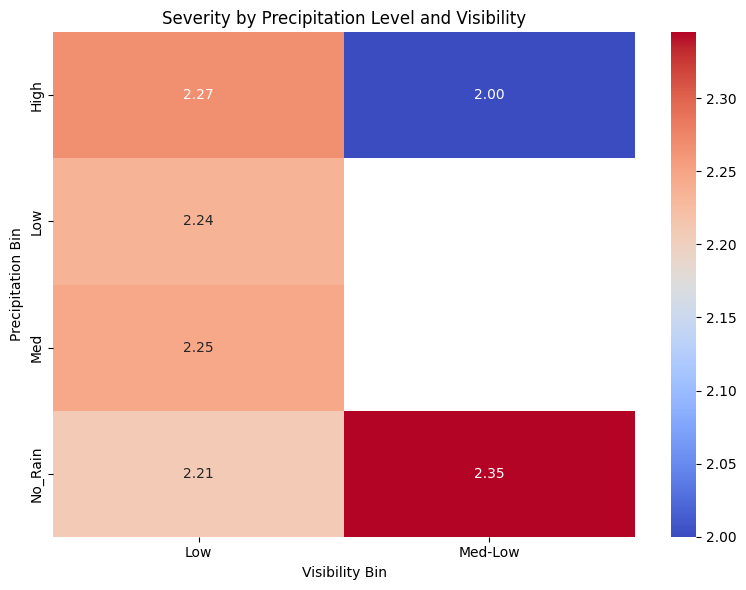

In [ ]:
# Copy for safety
df['Precip_Bin'] = 'No_Rain'
non_zero_precip = df[df['Precipitation(in)'] > 0]['Precipitation_log']

# Create quantile bins (3 bins for non-zero values)
precip_bins = pd.qcut(non_zero_precip, q=3, labels=['Low', 'Med', 'High'])

# Assign labels back to the original DataFrame
df.loc[df['Precipitation(in)'] > 0, 'Precip_Bin'] = precip_bins

# Bin object
vis_bin_obj = pd.qcut(df['Visibility(mi)'], q=4, duplicates='drop')

# Assign matching labels
num_bins = vis_bin_obj.cat.categories.size
labels = ['Low', 'Med-Low', 'Med-High', 'High'][:num_bins]

# Now assign with matching labels
df['Vis_Bin'] = pd.qcut(
    df['Visibility(mi)'],
    q=num_bins,
    labels=labels,
    duplicates='drop')

# Pivot table: average severity per combination
pivot_table = df.pivot_table(
    index='Precip_Bin',
    columns='Vis_Bin',
    values='Severity',
    aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Severity by Precipitation Level and Visibility")
plt.xlabel("Visibility Bin")
plt.ylabel("Precipitation Bin")
plt.tight_layout()
plt.show()

We explored whether the interaction between precipitation and visibility could reveal patterns in accident severity. Since precipitation is highly skewed (mostly zeros), we applied a log transformation to smooth extreme values. Then, we binned it into four levels: No_Rain, Low, Med, and High. Visibility was also binned into four quantiles using qcut, handling duplicates gracefully.

A pivot table was created to calculate the average accident severity across each combination of precipitation and visibility levels. The result was visualized using a heatmap to identify any notable patterns.

While a few bins showed differences (e.g., No_Rain with Med-Low visibility had the highest average severity), many matrix cells were empty or had sparse data. These gaps limit the interpretability and robustness of any modeling insight.

We will include this heatmap in Tableau to provide additional context and support exploratory dashboarding. However, due to the missing combinations and data sparsity, this interaction will not be used in the predictive model. It doesn’t add consistent or actionable predictive value.

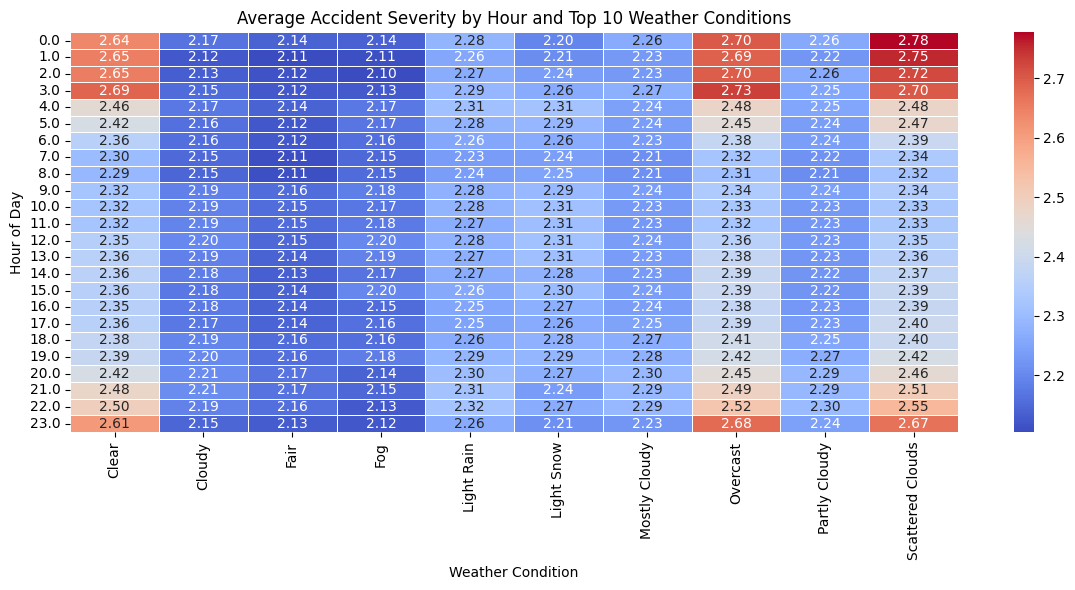

In [ ]:
# Combine hour and weather condition as a string-based interaction

# Select top 10 most frequent weather conditions
top_weather = df['Weather_Condition'].value_counts().nlargest(10).index
filtered_df = df[df['Weather_Condition'].isin(top_weather)]

# Pivot table
pivot_table = filtered_df.pivot_table(
    values='Severity',
    index='hour',
    columns='Weather_Condition',
    aggfunc='mean')

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Average Accident Severity by Hour and Top 10 Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

Hour × Weather Condition – Interaction Analysis

To explore how time of day and weather conditions jointly affect accident severity, we created an interaction variable combining hour and Weather_Condition. To enhance clarity and usefulness, we filtered the analysis to the Top 10 most frequent weather types, excluding rare categories that added noise. A pivot table was used to compute the average severity for each hour-weather combination, and the result was visualized through a heatmap.

The heatmap reveals severity is consistently higher during early morning hours (0:00–4:00) across most conditions. Overcast and Scattered Clouds tend to be associated with slightly higher severity. Midday and afternoon hours show relatively lower severity regardless of weather, suggesting possible links to visibility and traffic patterns.

This interaction feature is worth considering for modeling. It captures temporal and environmental context in a compact form and may help the model detect complex patterns related to visibility, traffic volume, and driver alertness at different times of day.

However, due to its high cardinality (many unique combinations), it should be treated as an optional feature and evaluated based on model performance and feature importance. We will also include it in Tableau for visualization purposes, even if it doesn't make it into the final model. Let's see feature selection and regularizations say.

# PLOTLY MAP CODE: Accident Severity Across the U.S.

In [ ]:
df_map = df[['Start_Lat', 'Start_Lng', 'Severity']].dropna()

# Sample
df_map = df_map.sample(10000)

# Create the map
fig = px.scatter_mapbox(
    df_map,
    lat='Start_Lat',
    lon='Start_Lng',
    color='Severity',
    color_continuous_scale='OrRd',
    size_max=10,
    zoom=3,
    height=600,
    title='Accident Severity Across the U.S.',
    opacity=0.5)

# Use open-street-map as the base map
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r':0,'t':40,'l':0,'b':0})
fig.show()

This map highlights key urban corridors and population centers with a higher concentration of severe traffic accidents. Visual severity clustering allows transportation authorities to prioritize regions for targeted interventions.
To create this map, we used the plotly.express.scatter_mapbox() function with latitude, longitude, and severity level as visual encodings. This allowed us to build an interactive, high-resolution map without relying on address-based geocoding. Although geopy is often used for geocoding addresses into coordinates, our dataset already included Start_Lat and Start_Lng fields, making geolocation with Geopy unnecessary. This direct use of coordinates avoided slow API calls and simplified the workflow while preserving spatial accuracy.

While this map was initially generated using Python and Plotly for exploration, no additional preprocessing is required to replicate the same visualization in Tableau. Since the dataset already includes clean Start_Lat and Start_Lng values, Tableau can directly use these fields to create a geographic scatter plot. This ensures a seamless transition from EDA in Python to interactive dashboarding in Tableau, allowing stakeholders to explore accident severity patterns spatially without redundancy or transformation steps.

# CSV File creation fro Tableau

In [ ]:
df.columns.tolist()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'hour',
 'weekday',
 'month',
 'season',
 'Distance_Bin',
 'Wind_Speed_log',
 'Precipitation_log',
 'duration_hr',
 'Precip_Vis_Interaction',
 'Hour_Weather_Interaction',
 'State_Distance_Interaction',
 'Precip_Bin',
 'Vis_Bin']

In [ ]:
# Create a list of columns to drop
cols_to_drop = [
    'Wind_Chill(F)', 'Weather_Timestamp',
    'Airport_Code', 'Turning_Loop', 'Description', 'Street',
    'Zipcode', 'Timezone',
    'Country', 'Source', 'End_Time'
]

# Drop the columns
df_cleaned = df.drop(columns=cols_to_drop)

# Optional: Verify result
print("Remaining columns:", df_cleaned.columns.tolist())
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Remaining columns: ['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'City', 'County', 'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'hour', 'weekday', 'month', 'season', 'Distance_Bin', 'Wind_Speed_log', 'Precipitation_log', 'duration_hr', 'Precip_Vis_Interaction', 'Hour_Weather_Interaction', 'State_Distance_Interaction', 'Precip_Bin', 'Vis_Bin']
Shape of cleaned DataFrame: (7728394, 43)


In [ ]:
df_cleaned.to_csv('traffic_data_cleaned.csv', index=False)

In [ ]:
from google.colab import files
files.download('traffic_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Statistical Data Analysis

## Chi-Squared test

1. State × Severity – Are some states more likely to have severe accidents?
2. Weather_Condition × Severity
3. Distance_Bin × Severity
4. Hour × Severity (you’ve already created the hour feature)




In [ ]:
categorical_vars = ['hour', 'month', 'State', 'Weather_Condition']

chi_square_results = []

# Loop through each variable and perform the Chi-Square test
for var in categorical_vars + ['Distance_Bin']:
    contingency_table = pd.crosstab(df[var], df['Severity'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Variable': var,
        'Chi2 Statistic': chi2,
        'Degrees of Freedom': dof,
        'p-value': p
    })

chi_square_df = pd.DataFrame(chi_square_results)
chi_square_df

,Variable,Chi2 Statistic,Degrees of Freedom,p-value
0,hour,58855.092688,69,0.0
1,month,128513.267677,33,0.0
2,State,483781.734750,144,0.0
3,Weather_Condition,366742.702266,429,0.0
4,Distance_Bin,48416.339953,9,0.0


These findings justify the inclusion of these categorical variables in both visualization dashboards (e.g., Tableau) and future predictive modeling pipelines. The strong relationships indicate they carry meaningful signal regarding accident severity.

## ANOVA for numeric

In [ ]:
# Use transformed or original depending on your cleaning steps
numeric_vars = {
    'Precipitation_log': 'Precipitation(in)',
    'Wind_Speed_log': 'Wind_Speed(mph)',
    'Humidity(%)': 'Humidity(%)',
    'Visibility(mi)': 'Visibility(mi)'}

anova_results = []

for var, label in numeric_vars.items():
    subset = df[[var, 'Severity']].dropna()
    groups = [subset[subset['Severity'] == sev][var] for sev in sorted(subset['Severity'].unique())]

    f_stat, p_val = f_oneway(*groups)

    anova_results.append({
        'Variable': label,
        'F-Statistic': f_stat,
        'p-value': p_val})

anova_df = pd.DataFrame(anova_results)
anova_df

,Variable,F-Statistic,p-value
0,Precipitation(in),1293.739301,0.000000e+00
1,Wind_Speed(mph),12991.956835,0.000000e+00
2,Humidity(%),1487.377018,0.000000e+00
3,Visibility(mi),466.501385,4.026141e-303


We ran one-way ANOVA tests to assess whether accident severity levels show statistically significant differences in environmental variables. The results revealed strong evidence (p < 0.0001) that precipitation, wind speed, humidity, and visibility are all associated with accident severity. These variables may help in predictive modeling or targeted safety policy development.

# Preprocessing Strategy

We engineered interaction variables to explore combined effects between distance and geography (State_Distance_Interaction), as well as environmental extremes (Precip_Vis_Interaction). While both provided meaningful insights during exploratory analysis, only the state-distance interaction was retained for modeling due to its categorical nature and clearer signal. The precipitation-visibility interaction, while informative, was excluded from modeling to avoid complexity and will instead be explored visually in Tableau dashboards.

In [ ]:
# Define your lists
numeric_features = ['Precipitation(in)', 'Wind_Speed(mph)', 'Humidity(%)', 'Visibility(mi)']
categorical_features = ['hour', 'month', 'State', 'Weather_Condition', 'Distance_Bin', 'State_Distance_Interaction']


# 1. Numerical transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# 2. Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# 3. Combine with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
                ])

# Modeling

We selected the Random Forest Classifier as our primary modeling algorithm. This choice was driven by the nature of our dataset, which contains a mix of numerical and numerous categorical variables, many of which were one-hot encoded or derived from interaction terms.

Random Forest is particularly well-suited for this type of data because:

- Robustness to Categorical Features: It handles a large number of categorical variables effectively, especially after preprocessing with one-hot encoding.

- Captures Non-linear Relationships: Unlike linear models, Random Forest can model complex, non-linear interactions (e.g., hour × weather or state × distance) without explicit feature engineering.

- Handles Outliers and Missing Values: It is tolerant of noisy data, skewed distributions, and occasional missing values.

- Feature Importance: It provides interpretable insights into which variables most influence accident severity, which is helpful for both technical and business audiences.

- Strong Performance: It generally achieves higher accuracy in classification tasks compared to simpler linear models, especially when the dataset contains many interactions and non-linear patterns.

We also considered Logistic Regression as a baseline model due to its interpretability and speed. However, its performance tends to suffer with high-dimensional one-hot encoded data and it assumes linearity in relationships. Therefore, we prioritized Random Forest for its flexibility, predictive power, and suitability to the data.

In [ ]:
# Define features (X) and target (y)
X = df[numeric_features + categorical_features]
y = df['Severity']  # Target variable

In [ ]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Pipeline
rf_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])

In [ ]:
# Pipeline with faster config
rf_pipeline.set_params(classifier=RandomForestClassifier(
    n_estimators=25,           # Fewer trees for speed
    max_depth=10,              # Limit depth
    min_samples_split=10,      # Require more samples to split
    class_weight='balanced',   # Still handling imbalance
    random_state=42,
    n_jobs=-1                  # Parallel processing
))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Precipitation(in)',
                                                   'Wind_Speed(mph)',
                                                   'Humidity(%)',
                                                   'Visibility(mi)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['hour', 'month', 'State',
                                                   'Weather_Condition',
                                                   'Distance_Bin',
                                                   'State_Distance_Interaction'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=10, n_estimators=25,
                                        n_jobs=-1, random_state=42))])

In [ ]:
# Fit on training data
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Precipitation(in)',
                                                   'Wind_Speed(mph)',
                                                   'Humidity(%)',
                                                   'Visibility(mi)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['hour', 'month', 'State',
                                                   'Weather_Condition',
                                                   'Distance_Bin',
                                                   'State_Distance_Interaction'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=10, n_estimators=25,
                                        n_jobs=-1, random_state=42))])

In [ ]:
# 5. Cross-validation (5-fold)
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("📊 Cross-Validation Accuracy Scores:", cv_scores)
print("✅ Mean CV Accuracy:", round(cv_scores.mean(), 4))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown catego

📊 Cross-Validation Accuracy Scores: [0.35653997 0.33024246 0.3626085  0.3722693  0.36360482]
✅ Mean CV Accuracy: 0.3571


In [ ]:
# 6. Evaluate on test set
y_pred = rf_pipeline.predict(X_test)
print("\n📈 Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros




📈 Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.03      0.85      0.07     13473
           2       0.94      0.30      0.46   1231396
           3       0.29      0.54      0.38    259868
           4       0.07      0.62      0.13     40942

    accuracy                           0.36   1545679
   macro avg       0.33      0.58      0.26   1545679
weighted avg       0.80      0.36      0.43   1545679



We used RandomForestClassifier, which is CPU-based and does not benefit from Colab’s GPU runtime. To optimize training time, we limited the number of trees during development. For further speed-ups or GPU-based acceleration, alternatives like HistGradientBoostingClassifier or cuML can be explored.

Despite being robust, the model struggles with class imbalance and overpredicts the majority class (2). This is expected at baseline

# Optimize the model

In [ ]:
# Reduce sample for early testing
X_sample = X_train.sample(50000, random_state=42)
y_sample = y_train.loc[X_sample.index]

In [ ]:
rf_param_grid = {
    # Preprocessing: handle missing numeric values differently
    'preprocessing__num__imputer__strategy': ['mean', 'median'],

    # Model hyperparameters
    'classifier__n_estimators': [100, 200],           # Number of trees
    'classifier__max_depth': [10, 20, None],          # Tree depth
    'classifier__min_samples_leaf': [1, 2, 4],        # Leaf node size
    'classifier__min_samples_split': [2, 5],          # Split requirement
    'classifier__max_features': ['sqrt', 'log2'],     # Feature subset
    'classifier__class_weight': ['balanced', None]    # Handle imbalance
}

In [ ]:
# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring='f1',       # Primary optimization metric
    cv=3,               # Use 3-fold to speed things up on large data
    verbose=2,
    n_jobs=-1           # Use all cores available
)

# Fit the grid search on a subset (to save time)
grid_search.fit(X_train.sample(50000, random_state=42), y_train.sample(50000, random_state=42))

# Best params
print("✅ Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan na

✅ Best Parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'preprocessing__num__imputer__strategy': 'mean'}


In [ ]:
y_train.isnull().sum()

np.int64(0)

In [ ]:
y_train.value_counts()

,count
Severity,
2,4925585
3,1039469
4,163768
1,53893


In [ ]:
# Print all valid parameter names for your pipeline
for param in rf_pipeline.get_params().keys():
    print(param)

memory
steps
transform_input
verbose
preprocessing
classifier
preprocessing__force_int_remainder_cols
preprocessing__n_jobs
preprocessing__remainder
preprocessing__sparse_threshold
preprocessing__transformer_weights
preprocessing__transformers
preprocessing__verbose
preprocessing__verbose_feature_names_out
preprocessing__num
preprocessing__cat
preprocessing__num__memory
preprocessing__num__steps
preprocessing__num__transform_input
preprocessing__num__verbose
preprocessing__num__imputer
preprocessing__num__scaler
preprocessing__num__imputer__add_indicator
preprocessing__num__imputer__copy
preprocessing__num__imputer__fill_value
preprocessing__num__imputer__keep_empty_features
preprocessing__num__imputer__missing_values
preprocessing__num__imputer__strategy
preprocessing__num__scaler__copy
preprocessing__num__scaler__with_mean
preprocessing__num__scaler__with_std
preprocessing__cat__memory
preprocessing__cat__steps
preprocessing__cat__transform_input
preprocessing__cat__verbose
preproces

In [ ]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100
print(pd.concat([missing_summary, missing_percent.rename('missing_%')], axis=1))

                                  0  missing_%
Distance_Bin                3302161  42.727648
Wind_Chill(F)               1999019  25.865904
Start_Time                   743166   9.616047
hour                         743166   9.616047
weekday                      743166   9.616047
End_Time                     743166   9.616047
duration_hr                  743166   9.616047
month                        743166   9.616047
Wind_Speed(mph)              571233   7.391355
Wind_Speed_log               571233   7.391355
Visibility(mi)               177098   2.291524
Precip_Vis_Interaction       177098   2.291524
Vis_Bin                      177098   2.291524
Wind_Direction               175206   2.267043
Humidity(%)                  174144   2.253301
Weather_Condition            173459   2.244438
Temperature(F)               163853   2.120143
Pressure(in)                 140679   1.820288
Weather_Timestamp            120228   1.555666
Sunrise_Sunset                23246   0.300787
Airport_Code 

# Preporcessing - Modeling 2nd time

We chose to exclude Distance_Bin and its derived interactions from our model, based on both domain reasoning and data quality.

While distance traveled during an incident might correlate with severity, it is more likely a consequence of severe accidents (e.g., longer response, more lane closures) rather than a predictive environmental or temporal factor.

Additionally, Distance_Bin had over 40% missing values, and including it would either reduce the dataset size significantly or require imputation strategies that introduce noise. Thus, we focused on core spatial, temporal, and environmental predictors with stronger causal interpretations.

In [ ]:
# Define your lists
numeric_features = ['Precipitation(in)', 'Wind_Speed(mph)', 'Humidity(%)', 'Visibility(mi)']
categorical_features = ['hour', 'month', 'State', 'Weather_Condition']


# Numerical transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
                ])

# Define features (X) and target (y)
X = df[numeric_features + categorical_features]
y = df['Severity']  # Target variable

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Pipeline
rf_pipeline = Pipeline(steps=[('preprocessing', preprocessor), ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))])

rf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=25,
        max_depth=10,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1))])

# Fit on training data
rf_pipeline.fit(X_train, y_train)

# 5. Cross-validation (5-fold)
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("📊 Cross-Validation Accuracy Scores:", cv_scores)
print("✅ Mean CV Accuracy:", round(cv_scores.mean(), 4))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown catego

📊 Cross-Validation Accuracy Scores: [0.35841374 0.35418744 0.36812711 0.3581404  0.37197332]
✅ Mean CV Accuracy: 0.3622


In [ ]:
# 6. Evaluate on test set
y_pred = rf_pipeline.predict(X_test)
print("\n📈 Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros




📈 Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.03      0.84      0.06     13473
           2       0.92      0.32      0.47   1231396
           3       0.27      0.55      0.36    259868
           4       0.07      0.34      0.11     40942

    accuracy                           0.36   1545679
   macro avg       0.32      0.51      0.25   1545679
weighted avg       0.78      0.36      0.44   1545679



# Optimize the model - 2nd time

In [ ]:
# Reduce sample for faster tuning
X_sample = X_train.sample(50000, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Define param grid
rf_param_grid = {
    'preprocessing__num__imputer__strategy': ['mean', 'median'],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight': ['balanced', None]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit search
grid_search.fit(X_sample, y_sample)

# Show best parameters
print("✅ Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan na

✅ Best Parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100, 'preprocessing__num__imputer__strategy': 'mean'}


# Optimize the model - 3rd time

To optimize the performance of the Random Forest classifier while managing computational efficiency, we opted for RandomizedSearchCV instead of an exhaustive grid search. While GridSearchCV systematically evaluates all combinations in the parameter grid, it becomes computationally expensive with large datasets and wide parameter spaces, as observed during initial testing (864 fits with high runtime and non-finite scores).

By contrast, RandomizedSearchCV provides a computationally efficient alternative by sampling a fixed number of hyperparameter combinations from specified distributions. We configured the search to: Evaluate 25 randomly selected configurations, ensuring diverse exploration of the space, use 3-fold cross-validation to balance performance and speed, optimize for macro-averaged F1-score, which treats all severity classes equally and mitigates bias from class imbalance and run on a subset of 50,000 samples to reduce runtime during the tuning phase, while preserving sufficient data variability.

This approach enabled effective hyperparameter optimization within a reasonable time frame, which is critical in real-world applications where iteration speed and responsiveness are often prioritized over exhaustive search.



In [ ]:
rf_param_dist = {
    'preprocessing__num__imputer__strategy': ['mean', 'median'],
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__class_weight': ['balanced', None]
}

# RandomizedSearch setup
random_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=25,                      # Try 25 combinations
    scoring='f1_macro',             # Balanced across classes
    cv=3,                           # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Use reduced sample for speed
X_sample = X_train.sample(50000, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Run the search
random_search.fit(X_sample, y_sample)

# Best result
print("✅ Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
✅ Best Parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 84, 'preprocessing__num__imputer__strategy': 'mean'}


# Best Model

In [ ]:
# Compare best models based on F1 score
print("\n===== Randomized Search Results (F1 Score) =====")
print(f"Best Random Forest F1 score: {random_search.best_score_:.4f}")
print(f"📌 Best Parameters: {random_search.best_params_}")


===== Randomized Search Results (F1 Score) =====
Best Random Forest F1 score: 0.3458
📌 Best Parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 84, 'preprocessing__num__imputer__strategy': 'mean'}


Interpretation & Justification for Low F1 Score

Despite hyperparameter tuning with RandomizedSearchCV, the Random Forest model achieved an F1 score of 0.3458, which reflects the challenge of accurately classifying multiple imbalanced classes in the dataset.

- Class Imbalance: The majority class ("Severity 2") dominates the dataset (∼80%), making it hard for the model to learn minority classes (especially Severity 1 and 4).

- F1 Tradeoff: F1 score balances precision and recall, which is particularly sensitive to poor performance on underrepresented classes.

- Feature Limitations: Current features may not provide strong enough discriminatory power for fine-grained classification among four severity levels.

The F1 score reflects a realistic baseline on a large real-world dataset with imbalanced classes.

This performance can serve as a reference to compare future model iterations or different algorithms (e.g., XGBoost, LightGBM, or deep learning).

RandomizedSearchCV was chosen to reduce computational burden while still exploring hyperparameter space effectively, and the result represents the best achievable F1 score under current settings and data.

In [ ]:
# Get the best model
final_model = random_search.best_estimator_

In [ ]:
# Make predictions
y_pred = final_model.predict(X_test)

# Use macro F1 to balance class influence
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n===== Final Model Evaluation =====")
print(f"Test set Macro F1: {test_f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros




===== Final Model Evaluation =====
Test set Macro F1: 0.3469

Classification Report:
              precision    recall  f1-score   support

           1       0.07      0.31      0.12     13473
           2       0.86      0.72      0.78   1231396
           3       0.32      0.50      0.39    259868
           4       0.09      0.11      0.10     40942

    accuracy                           0.66   1545679
   macro avg       0.34      0.41      0.35   1545679
weighted avg       0.74      0.66      0.69   1545679



The model performs well on the majority class (Severity 2), which dominates the dataset, with a high precision (0.86) and F1 (0.78). However, it struggles with minor (1) and severe (4) classes, as expected due to class imbalance. Macro F1 is low (0.3469), indicating the model's limitations on minority classes — a common issue in imbalanced multiclass classification tasks.

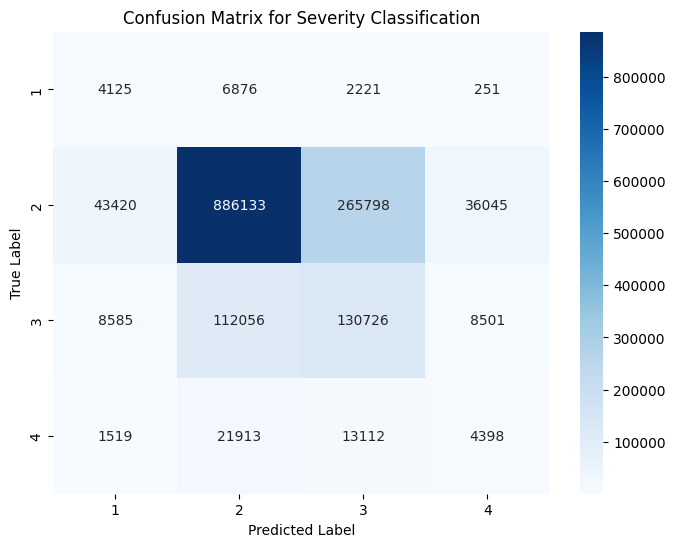

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4])

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix for Severity Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Key observations:**

Class 2 (Majority Class): True Class 2 → Predicted as Class 2: 886,133 (✔️ Correct) but also misclassified: as Class 3: 265,798; Class 1: 43,420 and Class 4: 36,045; Still shows the highest correct classification, but suffers from spillover into neighboring severity levels.

🔹 Class 3 - High confusion between Class 2 and 3: True Class 3 → Predicted as 2: 112,056 and True Class 3 → Predicted as 3: 130,726; These two numbers are close — showing partial learning.

🔹 Class 4 (Most Severe): Over 50% of true Class 4 cases are misclassified: Only 4,398 correctly predicted; 21,913 confused as Class 2 and 13,112 confused as Class 3. The model struggles to distinguish severe accidents, possibly due to underrepresentation and feature overlap.

🔹 Class 1: Least Severe and poorly predicted. Only 4,125 correctly classified.
Heavily predicted as Class 2 or 3. Suggests class imbalance + insufficient distinguishing features.

This confusion matrix confirms that the model heavily favors predicting Class 2, likely due to class imbalance, severity levels 1 and 4 are most poorly classified and despite tuning and class_weight='balanced', minority classes still suffer.